In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

Selon l'OMS le pourcentage d'adultes obèses en France d'ici 2030 sera de 25% pour les hommes et 29% pour les femmes. Actuellement, 56,8 % des hommes et 40,9 % des femmes en France sont en surpoids ou obèses. Des chiffres en progression constante et qui constituent un problème majeur de santé publique. 

Les principales causes de l'obésité ? 

-La consommation excessive d'aliments caloriques (Fast Food, aliments transformés etc) ; 

-La prédisposition génétique ; 

-Une pratique sportive insuffisante ou inexistante. 

 
### Notre idée d'application

<b>Sama assiette</b> souhaite aider les personnes qui souffrent de leur surpoids à trouver leur poids idéal, sans les soumettre à trop d'efforts, de tentations, d'écarts, de solitude. Nous avons alors imaginé un accompagnement sur-mesure permettant de comprendre et de traiter les causes du surpoids, ainsi que des menus et plats minceur favorisant une perte de poids douce et naturelle. 

 

## Checklist à effectuer pour commencer

### Analyse de la forme:
<p>Identification de la target: Nutriscore</p>
<p>Nombre de lignes et de colonnes</p>
<p>Types de variables</p>
<p>Identification des valeurs manquantes</p>

### Analyse du fond:
<p>Visualisation des target</p>
<p>Compréhension des différentes variables</p>
<p>Visualisation des features-target</p>
<p>Identification des Outliers</p>

## Cheklist Preprocessing
<p>Création du Train set/Test set</p>
<p>Elimination des Nan: dropna(), imputation, colonnes vides</p>
<p>Suppression des Outliers néfastes au modèle</p>
<p>Feature Selection</p>
<p>Feature Engineering</p>
<p>Feature Scaling</p>

In [2]:
dataset = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)


In [3]:
#dataset.head()

In [4]:
#dataset.tail()

In [5]:
def exploratory(data):
    print(f"Ce dataset contient {data.shape[0]} lignes etudiées sur {data.shape[1]} colonnes")
    #Recherche de doublons sur les lignes du dataset
    doublonL=data[data.duplicated(keep=False)]
    print(f"Il y a {doublonL.shape[0]} doublons dans les lignes")
    #Recherche de doublons sur les colonnes du dataset
    doublonC=data[data.duplicated(keep=False)].T
    print(f"Il y a {doublonC.shape[1]} doublons dans les colonnes")
    #Vérifie s'il y a des nan et les additionne pour chaque colonne
    perNan=data.isna().sum().sort_values(ascending=False)*100/len(data)
    print(f"Affichage du pourcentage de nan dans chaque colonnes: {perNan} %")
    #Observation du taux de remplissage de notre dataset
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))
    plt.title("Taux de remplissage du dataset")
    sns.heatmap(data.isnull(), cbar=False)
    plt.show()
    #compte les valeurs uniques de la série
    valeursUniques=data.nunique()
    print(f"Le nombre d'occurence des valeurs uniques:{valeursUniques}")
    ColumnData=data.columns
    print(f"La liste des colonnes est : {ColumnData}")
    

Ce dataset contient 320772 lignes etudiées sur 162 colonnes
Il y a 0 doublons dans les lignes
Il y a 0 doublons dans les colonnes
Affichage du pourcentage de nan dans chaque colonnes: water-hardness_100g                           100.000000
no_nutriments                                 100.000000
ingredients_that_may_be_from_palm_oil         100.000000
nutrition_grade_uk                            100.000000
nervonic-acid_100g                            100.000000
erucic-acid_100g                              100.000000
mead-acid_100g                                100.000000
elaidic-acid_100g                             100.000000
butyric-acid_100g                             100.000000
caproic-acid_100g                             100.000000
ingredients_from_palm_oil                     100.000000
lignoceric-acid_100g                          100.000000
cerotic-acid_100g                             100.000000
melissic-acid_100g                            100.000000
chlorophyl_100g   

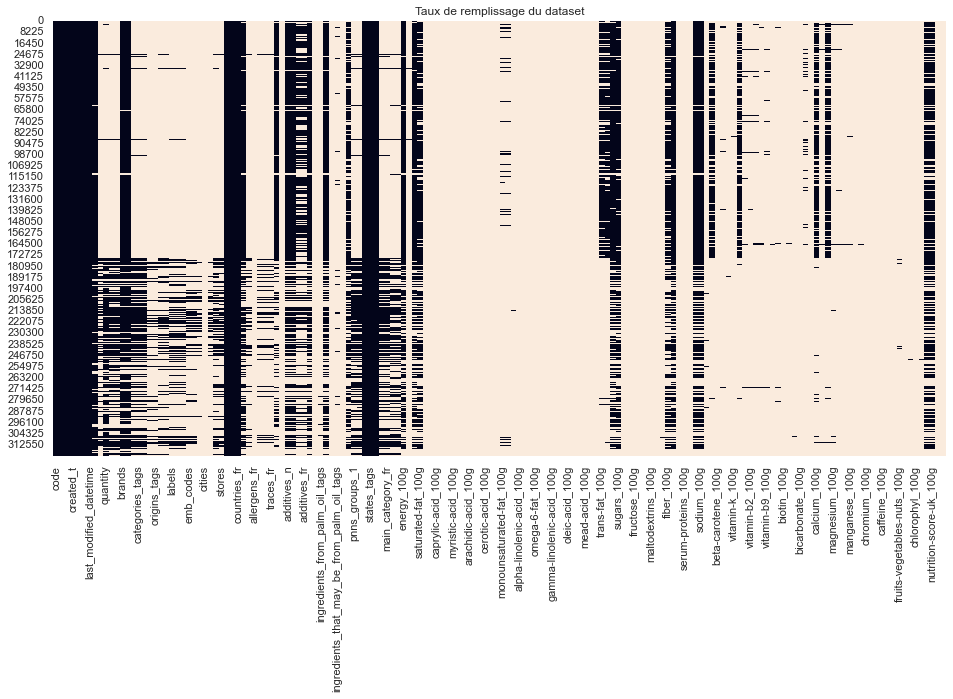

Le nombre d'occurence des valeurs uniques:code                                          320749
url                                           320749
creator                                         3535
created_t                                     189567
created_datetime                              189568
last_modified_t                               180495
last_modified_datetime                        180495
product_name                                  221347
generic_name                                   38584
quantity                                       13826
packaging                                      14547
packaging_tags                                 12064
brands                                         58784
brands_tags                                    50253
categories                                     36982
categories_tags                                21142
categories_fr                                  21152
origins                                         4840
orig

In [6]:
exploratory(dataset)

In [7]:
listColumns = dataset.columns.tolist()

On remarque qu'il y a beaucoup de colonnes vides

# Suppression de colonnes avec un taux de remplissage inférieur à 25%

In [8]:
null_columns = [col for col in dataset.columns if dataset.isna().sum()[col]>=(320772*0.75)]
dataset[null_columns]

,generic_name,packaging,packaging_tags,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,allergens,allergens_fr,traces,traces_tags,traces_fr,no_nutriments,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,image_url,image_small_url,energy-from-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,casein_100g,serum-proteins_100g,nucleotides_100g,alcohol_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,phosphorus_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,glycemic-index_100g,water-hardness_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
colToDel=dataset[null_columns].columns.tolist()

In [10]:
colToDel

['generic_name',
 'packaging',
 'packaging_tags',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_uk',
 'image_url',
 'image_small_url',
 'energy-from-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'ome

In [11]:
dataset.drop(colToDel,inplace=True, axis=1)

In [12]:
dataset.shape

(320772, 50)

Il ne nous reste plus que 50 colonnes sur les 162 initiales.


# Essayons de les regrouper par pays

In [13]:
data=dataset.groupby(by='countries_tags').count()
#display(data)

On remarque que la plupart des données viennent des Etats Unis et de la France.
On ne gardera que les produits venant de ces deux pays.

In [14]:
listTofilter= dataset['countries_tags'].tolist()
listTofilter

['en:france',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:united-states',
 'en:france',
 'en:united-kingdom',
 'en:

In [15]:
data1=dataset[dataset.countries_tags=='en:france']
data2=dataset[dataset.countries_tags=='en:united-states']
frames = [data1, data2]
dataset = pd.concat(frames)
#display(dataset)

In [16]:
dataset=dataset.drop(['countries','countries_fr'], axis=1)

Les colonnes countries, countries_tags et countries_fr fournissent les mêmes informations. Nous ne garderons que la colonne counntries_tags dans la suite de notre analyse

# Suppression des données redondantes 

In [17]:
dataset= dataset.drop(['created_datetime','last_modified_datetime','brands','additives_tags','states','states_fr','main_category'], axis=1)

In [18]:
display(dataset)

,code,url,creator,created_t,last_modified_t,product_name,quantity,brands_tags,categories,categories_tags,categories_fr,countries_tags,ingredients_text,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_tags,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,1474103893,Farine de blé noir,1kg,ferme-t-y-r-nao,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000000024600/filet-de-boeuf,date-limite-app,1434530704,1434535914,Filet de bœuf,2.46 kg,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-completed,en:characteristics-to-be-completed,en:categories-completed,en:brands-to-be-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded",Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000000027205,tacinte,1458238630,1458238638,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-to-be-completed,en:photos-to-be-validated,en:photos-uploaded",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000000039259/twix-x2,tacinte,1422221773,1473538082,Twix x2,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000005200016/lentilles-vertes-bertrand-lejeune,sigoise,1441186657,1442570752,lentilles vertes,1 kg,bertrand-lejeune,"Aliments et boissons à base de végétaux,Aliments d'origine végétale,Légumineuses et dérivés,Céréales et pommes de terre,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles vertes","en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:legumes-and-their-products,en:legumes,en:seeds,en:legume-seeds,en:pulses,en:lentils,en:green-lentils","Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Légumineuses et dérivés,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles,Lentilles vertes",en:france,lentilles vertes,NaN,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] [ lentilles -> fr:lentilles ],NaN,0.0,0.0,NaN,Cereals and 

In [19]:
dataset.shape

(267389, 41)

Il ne nous reste plus que 41 colonnes à considérer

In [20]:
dataset.columns

Index(['code', 'url', 'creator', 'created_t', 'last_modified_t',
       'product_name', 'quantity', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries_tags',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states_tags', 'main_category_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [21]:
dataset= dataset.drop(['code','url','creator', 'created_t', 'last_modified_t','quantity', 'serving_size','additives_n',
       'additives', 'additives_fr', 'ingredients_from_palm_oil_n','categories','categories_fr','categories_tags','countries_tags','brands_tags','code',
       'ingredients_that_may_be_from_palm_oil_n', 'pnns_groups_1', 'pnns_groups_2', 'states_tags', 'main_category_fr','vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g','nutrition-score-uk_100g','cholesterol_100g','carbohydrates_100g','trans-fat_100g','fat_100g','sodium_100g'], axis=1)

In [22]:
dataset

,product_name,ingredients_text,nutrition_grade_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Filet de bœuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,lentilles vertes,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
320742,Natural Cassava,Cassava.,a,1477.0,0.0,2.35,4.7,1.18,0.03048,-1.0
320744,Ferrero Rocher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320750,Raspados Ice Bars,"Water, high fructose corn syrup, contains 2% or less of the following: maltodextrin, citric acid, pectin, natural and artificial flavors, sodium citrate, caramel color, sodium benzoate and potassium sorbate (preservatives), yellow 5, red 40, yellow 6.",NaN,368.0,NaN,19.30,NaN,0.00,0.04572,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint","Organic peppermint, organic lemon grass, organic spearmint.",b,0.0,0.0,0.00,0.0,0.00,0.00000,0.0


In [23]:
varNum=dataset.columns.tolist()
varNum

['product_name',
 'ingredients_text',
 'nutrition_grade_fr',
 'energy_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

In [24]:
dataset.shape

(267389, 10)

In [29]:
dataset.isna().sum()*100/len(dataset)

product_name                2.799666
ingredients_text           16.954699
nutrition_grade_fr         26.100924
energy_100g                12.988567
saturated-fat_100g         23.396250
sugars_100g                17.863861
fiber_100g                 31.367783
proteins_100g              13.263074
salt_100g                  13.848363
nutrition-score-fr_100g    26.100924
dtype: float64

In [30]:
dataset.dtypes

product_name                object
ingredients_text            object
nutrition_grade_fr          object
energy_100g                float64
saturated-fat_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
nutrition-score-fr_100g    float64
dtype: object

In [31]:
dataset.shape

(267389, 10)

In [32]:
dataset.describe()

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,2.326590e+05,204830.000000,219623.000000,183515.000000,231925.000000,230360.000000,197598.000000
mean,1.142814e+03,5.051005,16.114021,2.846670,7.070508,2.117359,9.192537
std,6.821498e+03,7.937587,22.576395,13.388568,8.487080,135.063580,9.023773
min,0.000000e+00,0.000000,-17.860000,-6.700000,-800.000000,0.000000,-15.000000
25%,3.770000e+02,0.000000,1.300000,0.000000,0.500000,0.063500,1.000000
50%,1.109000e+03,1.790000,5.880000,1.500000,4.690000,0.604520,10.000000
75%,1.674000e+03,7.140000,24.200000,3.600000,10.000000,1.400000,16.000000
max,3.251373e+06,550.000000,3520.000000,5380.000000,430.000000,64312.800000,40.000000


In [33]:
dataset.isna().sum()

product_name                7486
ingredients_text           45335
nutrition_grade_fr         69791
energy_100g                34730
saturated-fat_100g         62559
sugars_100g                47766
fiber_100g                 83874
proteins_100g              35464
salt_100g                  37029
nutrition-score-fr_100g    69791
dtype: int64

# Traitement des valeurs manquantes


In [47]:
datasetCopy= dataset.copy()

In [48]:
datasetCopy.shape

(267389, 10)

In [49]:
datasetCopy=datasetCopy.dropna()

In [50]:
datasetCopy.isna().sum()

product_name               0
ingredients_text           0
nutrition_grade_fr         0
energy_100g                0
saturated-fat_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
nutrition-score-fr_100g    0
dtype: int64

In [52]:
datasetCopy.shape

(159062, 10)

#  Traitement des Outliers

In [54]:
min_thresold_1, max_thresold_1=dataset['salt_100g'].quantile([0.05,0.95])
min_thresold_1, max_thresold_1
datasetCopy= datasetCopy[(datasetCopy['salt_100g']<max_thresold_1) & (datasetCopy['salt_100g']>min_thresold_1) ]

In [55]:
min_thresold_2, max_thresold_2=dataset['fiber_100g'].quantile([0.05,0.95])
min_thresold_2, max_thresold_2
datasetCopy= datasetCopy[(datasetCopy['fiber_100g']<max_thresold_2) & (datasetCopy['fiber_100g']>min_thresold_2) ]

In [56]:
min_thresold_3, max_thresold_3=dataset['sugars_100g'].quantile([0.05,0.95])
min_thresold_3, max_thresold_3
datasetCopy= datasetCopy[(datasetCopy['sugars_100g']<max_thresold_3) & (datasetCopy['sugars_100g']>min_thresold_3) ]

In [57]:
min_thresold_4, max_thresold_4=dataset['saturated-fat_100g'].quantile([0.05,0.95])
min_thresold_4, max_thresold_4
datasetCopy= datasetCopy[(datasetCopy['saturated-fat_100g']<max_thresold_4) & (datasetCopy['saturated-fat_100g']>min_thresold_4) ]

In [58]:
min_thresold_5, max_thresold_5=dataset['energy_100g'].quantile([0.05,0.95])
min_thresold_5, max_thresold_5
datasetCopy= datasetCopy[(datasetCopy['energy_100g']<max_thresold_5) & (datasetCopy['energy_100g']>min_thresold_5) ]

In [59]:
datasetCopy.describe()

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,49093.000000,49093.000000,49093.000000,49093.000000,49093.000000,49093.000000,49093.000000
mean,1297.929870,5.014277,16.324063,3.009655,7.399222,0.877703,9.500866
std,661.184355,4.709328,16.514168,2.187578,5.494437,0.688466,8.518261
min,64.000000,0.000100,0.010000,0.001000,0.000000,0.000005,-14.000000
25%,699.000000,1.330000,2.670000,1.400000,3.570000,0.350520,2.000000
50%,1381.000000,3.530000,8.240000,2.400000,6.400000,0.769620,10.000000
75%,1891.000000,7.140000,28.070000,3.600000,9.700000,1.200000,16.000000
max,2387.000000,19.670000,62.960000,10.600000,82.000000,4.119880,33.000000


# Analyse exploratoire*

### Analyse univariée

In [100]:
label_a = datasetCopy.loc[datasetCopy['nutrition_grade_fr']=='a']
label_b = datasetCopy.loc[datasetCopy['nutrition_grade_fr']=='b']
label_c = datasetCopy.loc[datasetCopy['nutrition_grade_fr']=='c']
label_d = datasetCopy.loc[datasetCopy['nutrition_grade_fr']=='d']
label_e = datasetCopy.loc[datasetCopy['nutrition_grade_fr']=='e']

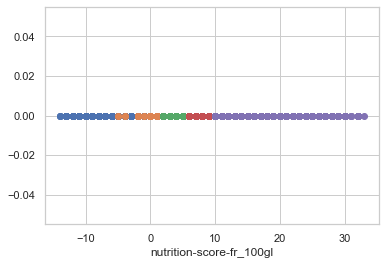

In [101]:
plt.plot(label_a['nutrition-score-fr_100g'],np.zeros_like(label_a['nutrition-score-fr_100g']), 'o')
plt.plot(label_b['nutrition-score-fr_100g'],np.zeros_like(label_b['nutrition-score-fr_100g']), 'o')
plt.plot(label_c['nutrition-score-fr_100g'],np.zeros_like(label_c['nutrition-score-fr_100g']), 'o')
plt.plot(label_d['nutrition-score-fr_100g'],np.zeros_like(label_d['nutrition-score-fr_100g']), 'o')
plt.plot(label_e['nutrition-score-fr_100g'],np.zeros_like(label_e['nutrition-score-fr_100g']), 'o')
plt.xlabel('nutrition-score-fr_100gl')
plt.show()

<AxesSubplot:>

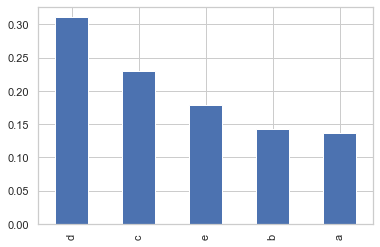

In [102]:
datasetCopy['nutrition_grade_fr'].value_counts(normalize=True).plot.bar()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


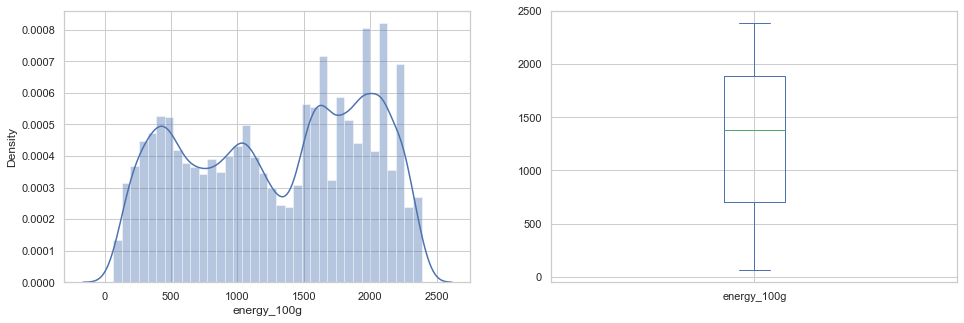

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


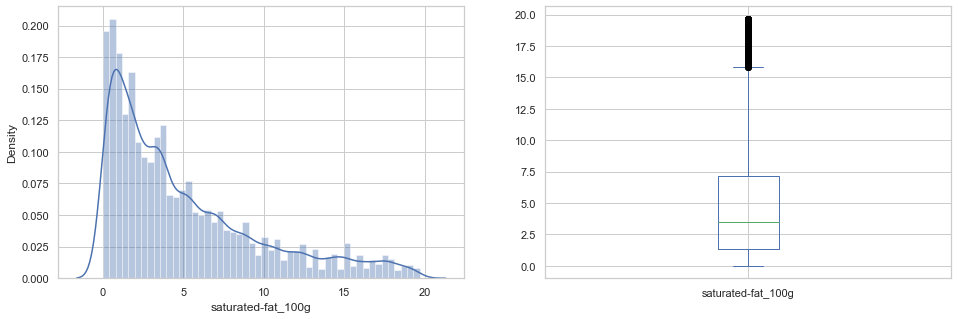

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


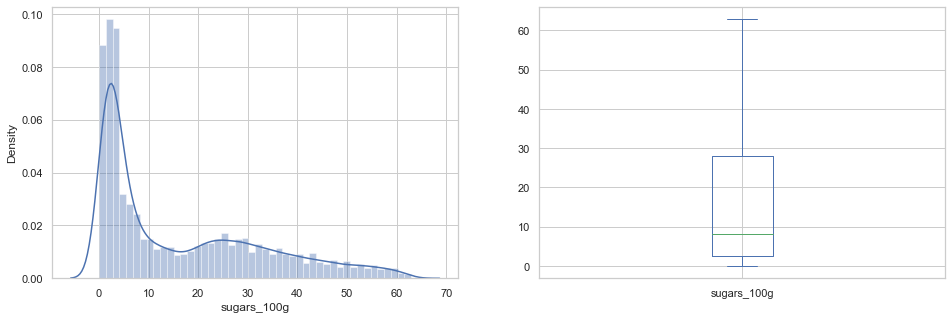

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


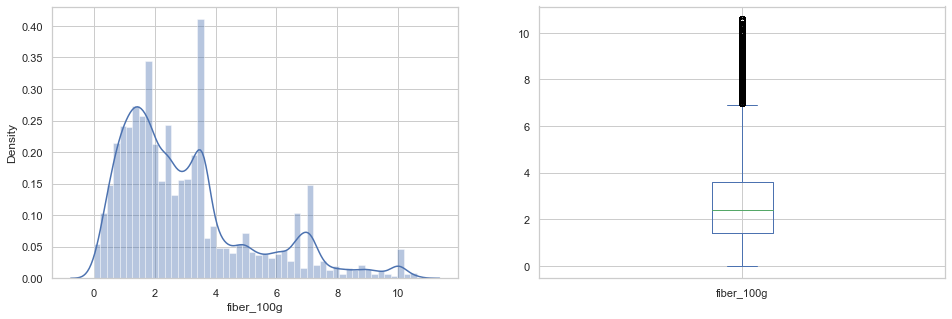

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


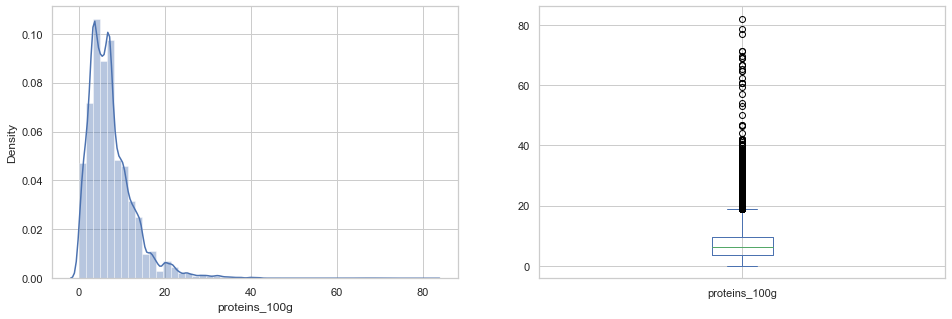

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


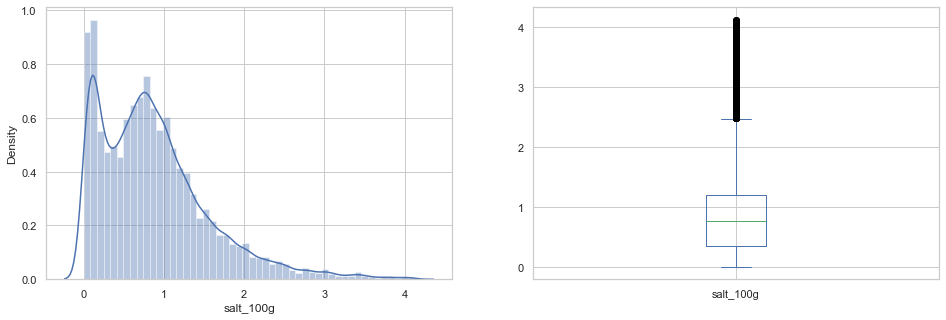

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


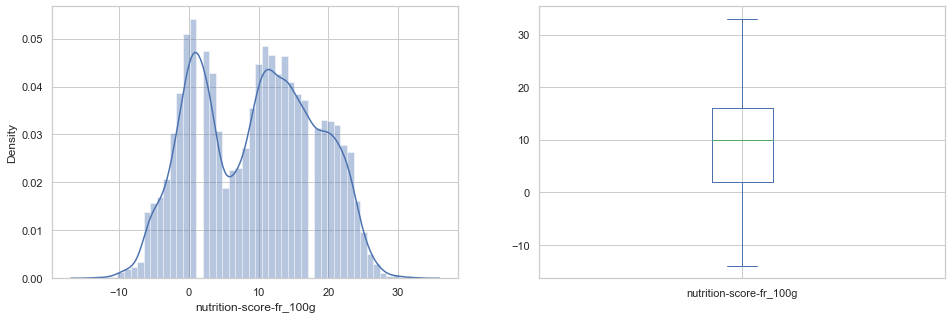

In [103]:
for i in varNum[3:]:
    plt.figure(1)
    plt.subplot(121)
    sns.distplot(datasetCopy[i])

    plt.subplot(122)
    datasetCopy[i].plot.box(figsize=(16,5))

    plt.suptitle('')
    plt.show()

### Analyse Bvariée

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


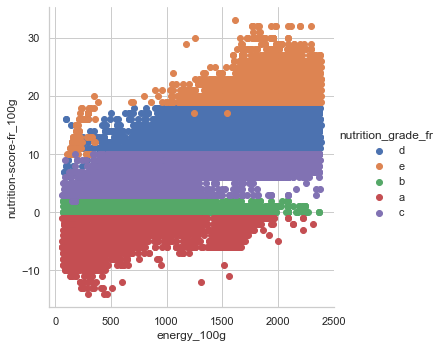

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


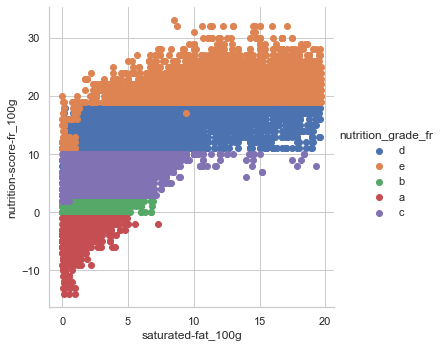

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


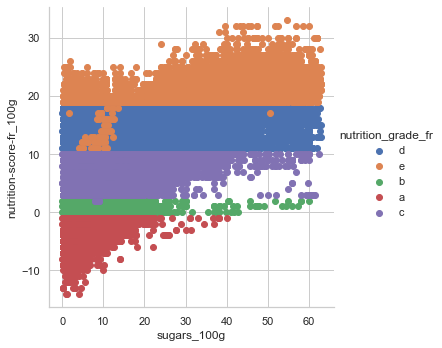

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


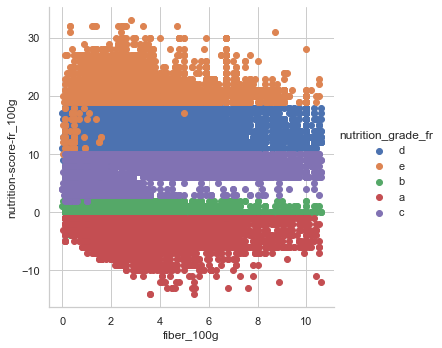

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


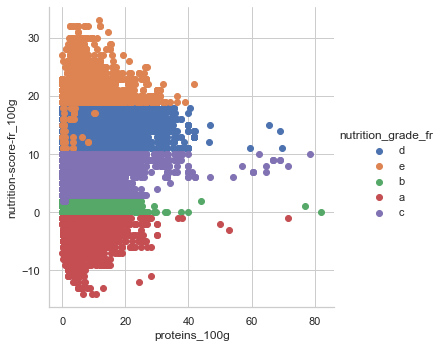

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


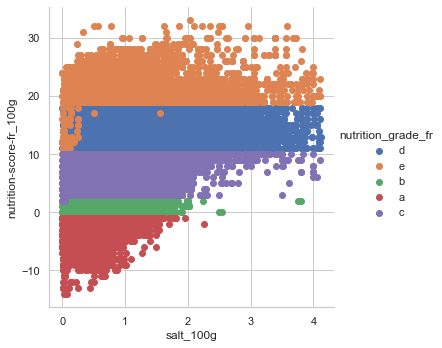

In [104]:
for i in varNum[3:-1]:
    sns.FacetGrid(datasetCopy, hue='nutrition_grade_fr',size=5).map(plt.scatter,i,'nutrition-score-fr_100g').add_legend()
    plt.show()

<AxesSubplot:>

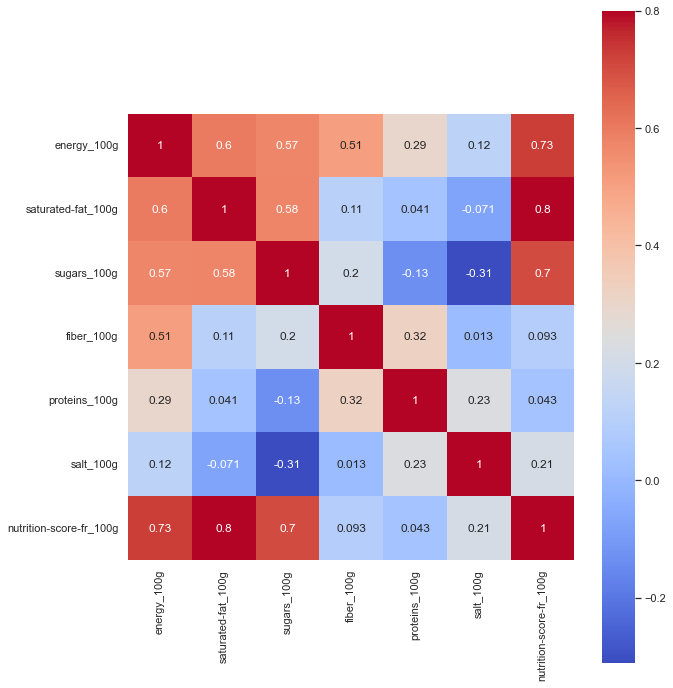

In [105]:
matrix=datasetCopy.corr()
f,ax= plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax=.8, square=True, cmap='coolwarm', annot=True)

# Analyse Multivariée

In [120]:
data= datasetCopy.copy()

In [106]:
goodNutriscore=data[(data.nutrition_grade_fr=='a') | (data.nutrition_grade_fr=='b')]
badNutriscore=data[(data.nutrition_grade_fr=='c') | (data.nutrition_grade_fr=='b') |(data.nutrition_grade_fr=='c')]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

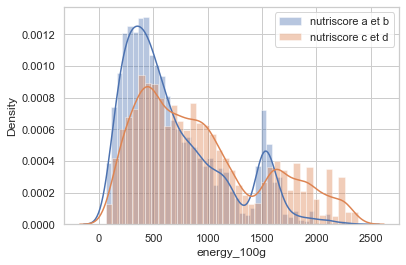

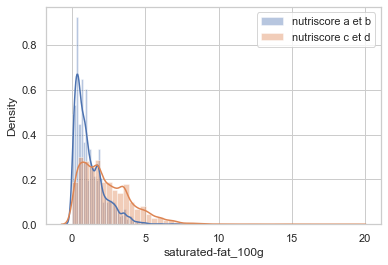

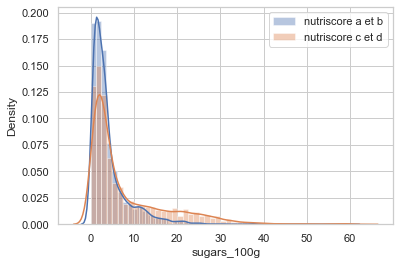

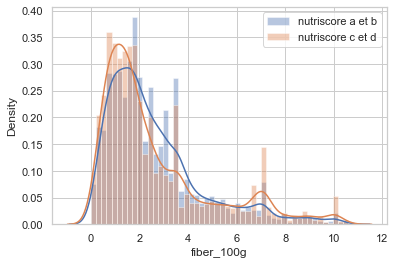

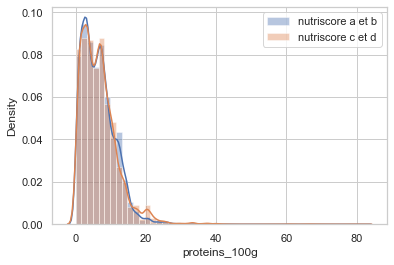

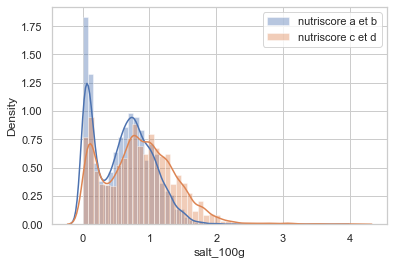

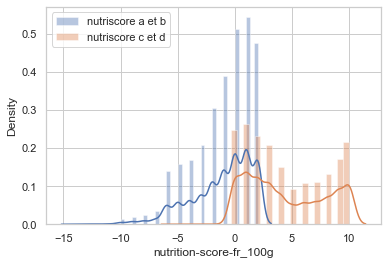

In [107]:
for col in varNum[3:]:
    plt.figure()
    sns.distplot(goodNutriscore[col], label= 'nutriscore a et b')
    sns.distplot(badNutriscore[col], label= 'nutriscore c et d')
    plt.legend()

In [108]:
data=data.drop(['product_name','ingredients_text'], axis=1)

In [109]:
X = data.iloc[:,1:].values


In [110]:
from sklearn.preprocessing import scale

X = scale(X)

In [111]:
X

array([[ 0.9106027 , -0.53389826,  0.58592331, ..., -0.25466418,
        -0.31621798,  0.2933885 ],
       [ 0.71095892, -0.53389826,  0.70703268, ..., -0.291065  ,
        -0.33074316,  0.41078455],
       [ 0.56273854, -0.6400716 ,  1.07036077, ..., -0.4548687 ,
        -0.40336908,  0.2933885 ],
       ...,
       [ 0.8274178 , -0.09858759, -0.43805638, ...,  0.30772854,
         1.37410668,  0.41078455],
       [ 0.5929876 , -0.13256305, -0.03234   , ...,  0.88832167,
        -1.20847095, -0.29359176],
       [ 0.14378909, -0.47444119,  0.86205266, ..., -0.33474599,
         0.10864364,  0.17599245]])

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [113]:
pca = PCA(n_components=2)

In [114]:
principalComponents = pca.fit_transform(X)


In [115]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [116]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.436056,-0.541761
1,0.477804,-0.605838
2,0.409160,-0.927658
3,2.175009,-0.965332
4,2.228870,-0.586976


In [129]:
finalDf = pd.concat([principalDf, data[['nutrition_grade_fr']]], axis = 1)
finalDf.shape

(89519, 3)

In [130]:
finalDf['nutrition_grade_fr'].isnull().sum()*100/len(finalDf)

45.15912822976128

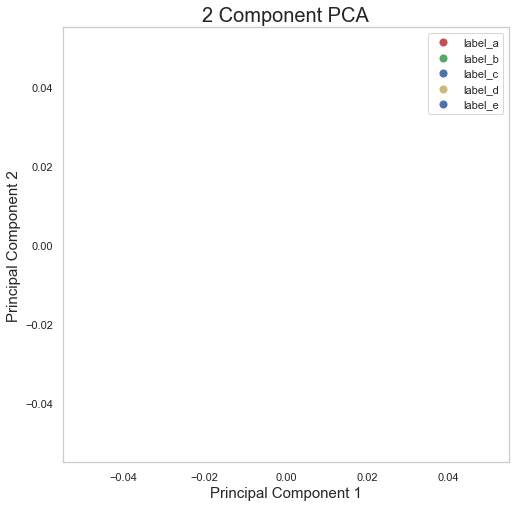

In [132]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['label_a', 'label_b', 'label_c','label_d','label_e']
colors = ['r', 'g', 'b','y','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['nutrition_grade_fr'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()